# TCDS Statistics 101

This R notebook is a template for the functions we will create during the class.
 
The functions are empty and you have to write the code that will do the required task. Even that those functions exist yet in R, the idea is that you recreate them by yourself using the knowledge we aquired in the class.


In [4]:
## change the size of the graphs
options(repr.plot.width = 3, repr.plot.height = 3)

# Dataset

In [12]:
## data

x1 <- mtcars$cyl
x2 <- mtcars$mpg
x3 <- mtcars$wt
x4 <- mtcars$qsec

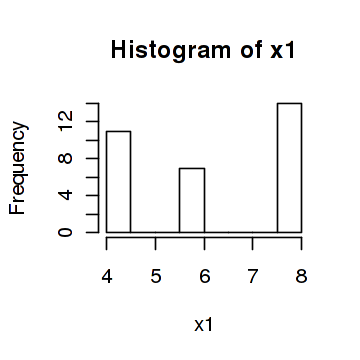

In [9]:
hist(x1)

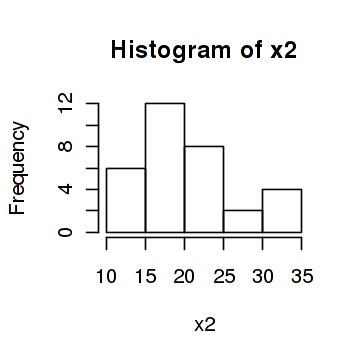

In [10]:
hist(x2)

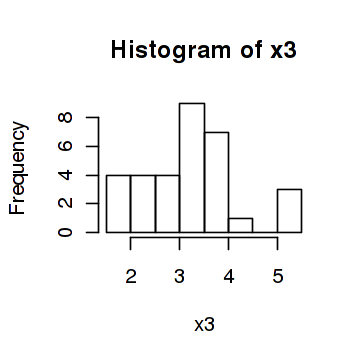

In [11]:
hist(x3)

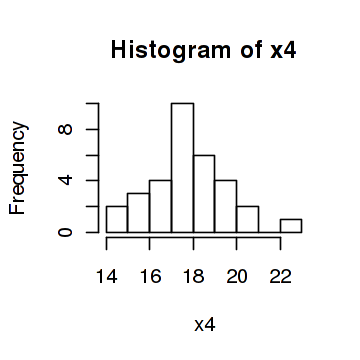

In [13]:
hist(x4)

# Central Tendency Measures

In [33]:
### create a function that shows the most frequent element in a vector. 
### If there are more than one element that are the most frequent and has the same count, return all of them

MODE <- function(x) {
    tab <- table(x)
    Xmo <- tab[order(tab,decreasing = T)]
    return(Xmo)
}

In [38]:
print(x1[order(x1)])
print(MODE(x1))

 [1] 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8
x
 8  4  6 
14 11  7 


In [36]:
### create a function that shows the median of a given vector. 

MEDIAN <- function(x) {
    Xord <- x[order(x)]
    middle <- length(x)/2
    ## we use the functions floor and ceiling to round the middle down and up respectively
    Xme <- (Xord[floor(middle)] + Xord[ceiling(middle)])/2
    return(Xme)
}


In [39]:
print(x1[order(x1)])
print(MEDIAN(x1))
print(median(x1))

 [1] 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8
[1] 6
[1] 6


In [40]:
### create a function that shows the mean (average) of a given vector. 

AVG <- function(x) {
    Xmn <- sum(x)/length(x)
    return(Xmn)
}


In [41]:
print(AVG(x4))
print(mean(x4))

[1] 17.84875
[1] 17.84875


# Dispersion Measures

In [42]:
### Create a function that shows the range and in parenthesis the min-max values.

RANGE <- function(x) {
    rng <- paste(max(x)-min(x)," (",min(x),",",max(x),")",sep="")
    return(rng)
}

In [45]:
print(RANGE(x4))
summary(x4)

[1] "8.4 (14.5,22.9)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.50   16.89   17.71   17.85   18.90   22.90 

In [51]:
### Create a function that shows the Interquartile range (IQR) and in parenthesis the 25%-75% values.
### You can check the help for the 'quartile' function.

IQR <- function(x) {
  q25 <- quantile(x,probs = 0.25)
  q75 <- quantile(x,probs = 0.75)
  iqr <- paste(q75-q25, " (",q25," , ",q75,")",sep="")
  return(iqr)
}

In [52]:
print(IQR(x4))
print(summary(x4))

[1] "2.0075 (16.8925 , 18.9)"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.50   16.89   17.71   17.85   18.90   22.90 


In [53]:
### create a function that shows the variabce of a given vector. 

VAR <- function(x) {
  mu <- AVG(x)
  N <- length(x) 
  xdiff <- sum((x-mu)^2)
  Xvar <- xdiff/(N-1)
  return(Xvar)
}

In [54]:
print(VAR(x4))
print(var(x4))

[1] 3.193166
[1] 3.193166


In [55]:
### create a function that shows the standard deviation of a given vector. 

StdDev <- function(x) {
  mu <- AVG(x)
  N <- length(x) 
  xdiff <- sum((x-mu)^2)
  sigma <- sqrt(xdiff/(N-1))
  return(sigma)
}


In [56]:
print(StdDev(x4))
print(sd(x4))

[1] 1.786943
[1] 1.786943


In [57]:
### create a function that shows the standard error of a given vector. 

StdErr <- function(x) {
  N <- length(x)
  Xerr <- StdDev(x)/sqrt(N)
  return(Xerr)
}


In [60]:
print(StdErr(x4))

[1] 0.3158899


In [63]:
### create a function that shows the confidence interval of a given proportion
### for a given alpha, we can calculate the critical value z using this formula:
###   z <- qnorm(1 - (alpha/2))
### Give the proportion and the lower and upper confidence interval in parenthesis.

CIprop <- function(prop, alpha=0.05) {
  z <- qnorm(1 - (alpha/2))
  ci <- z * (prop*(1-prop))
  ci <- paste(prop," (",prop-ci,",",prop+ci,")",sep="")
  return(ci)
}


In [65]:
x5 <- mtcars$vs
VSprop <- sum(x5)/length(x5)
print(CIprop(VSprop))

[1] "0.4375 (-0.0448348868204038,0.919834886820404)"


In [66]:
### create a function that shows the confidence interval of the mean for a given vector
### for a given alpha, we can calculate the critical value z using this formula:
###   z <- qnorm(1 - (alpha/2))
### Give the mean and the lower and upper confidence interval in parenthesis.

CImu <- function(x,alpha=0.05) {
  z <- qnorm(1 - (alpha/2))
  ci <- z * StdErr(x)
  ci <- round(ci,3)
  ci <- paste(AVG(x)," (",AVG(x)-ci,",",AVG(x)+ci,")",sep="")
  return(ci)
}


In [67]:
print(CImu(x4))

[1] "17.84875 (17.22975,18.46775)"


# Data Distributions
 
## Gaussian distribution

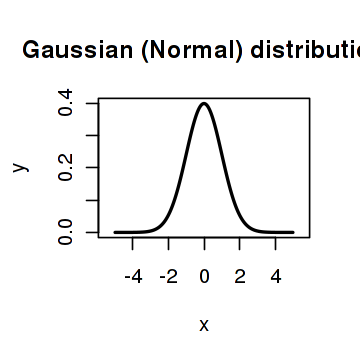

In [14]:
# define the distribution parameters
x <- seq(-5, 5, 0.001)
mean = 0.0
stdev = 1.0
# calculate the normal dist
y = dnorm(x, mean=mean, sd=stdev)
# plot
plot(x,y, type="l", lwd = 2, xlim=c(-5.5, 5.5), main="Gaussian (Normal) distribution")

## t-distribution (Student)

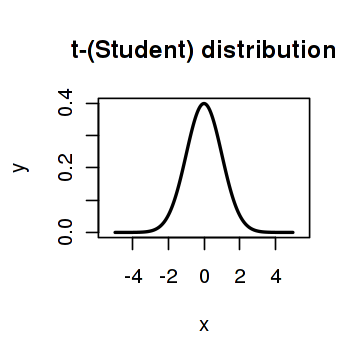

In [15]:
# define the distribution parameters
x = seq(-5, 5, 0.001)
dof = length(x) - 1
# calculate the pdf
y = dt(x,dof)
# plot
plot(x, y, type="l", lwd = 2, xlim=c(-5.5, 5.5), main="t-(Student) distribution")


## ChiSqare-distribution

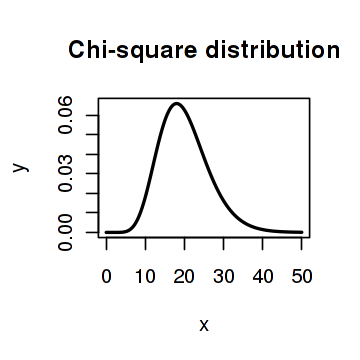

In [16]:
# define the distribution parameters
x = seq(0, 50, 0.01)
dof = 20
# calculate the pdf
y = dchisq(x,dof)
# plot
plot(x, y, type="l", lwd = 2, xlim=c(0, 50), main="Chi-square distribution")


## Poisson distribution

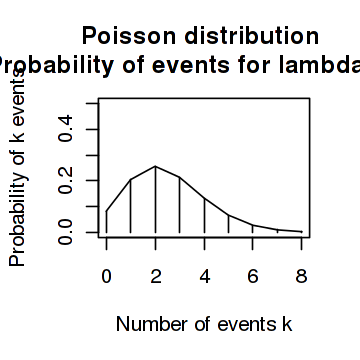

In [21]:
## from x= 0 to 8, with lambda=2.5.
x=0:8
px = dpois(x, lambda=2.5)
plot(x, px, type="h", 
     xlab="Number of events k", 
     ylab="Probability of k events", 
     ylim=c(0,0.5), pty="s", 
     main="Poisson distribution \n Probability of events for lambda = 2.5")
lines(x, px)


## Binomial (Bernoulli) distribution

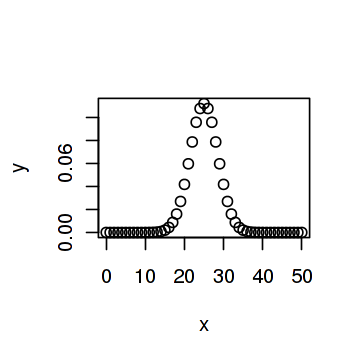

In [18]:
## Create a sample of 50 numbers which are incremented by 1.
x <- seq(0,50,by = 1)
# Create the binomial distribution.
y <- dbinom(x,50,0.5)
# Plot the graph for this sample.
plot(x,y)


# Similarity Measures

In [69]:
### create a function that calculates the Pearson correlation statistic between two vectors

Pearson.corr <- function(x,y) {
  pcor <- cov(x,y)/(StdDev(x)*StdDev(y))
  return(pcor)
}

In [76]:
Pearson.corr(x4,x3)
cor.test(x4,x3,method = "pearson")

[1] -0.1747159


	Pearson's product-moment correlation

data:  x4 and x3
t = -0.97191, df = 30, p-value = 0.3389
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4933536  0.1852649
sample estimates:
       cor 
-0.1747159 


In [77]:
### create a function that calculates the Spearman correlation statistic between two vectors

Spearman.corr <- function(x,y) {
  require(dplyr)
  df <- data.frame(x=x,y=y)
  df <- df %>% arrange(x) 
  df$ox <- seq(1,nrow(df),1)
  df <- df %>% arrange(y) 
  df$oy <- seq(1,nrow(df),1)
  aggx <- df %>% group_by(x) %>% summarise(mox=mean(ox))
  aggy <- df %>% group_by(y) %>% summarise(moy=mean(oy))
  df <- inner_join(df, aggx)
  df <- inner_join(df, aggy)
  rho <- Pearson.corr(df$mox,df$moy)
  return(rho)
}

In [78]:
Spearman.corr(x4,x3)
cor.test(x4,x3,method = "spearman")

Joining, by = "x"
Joining, by = "y"


[1] -0.2254012

Warning message in cor.test.default(x4, x3, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  x4 and x3
S = 6685.8, p-value = 0.2148
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2254012 


## Correlation Matrix



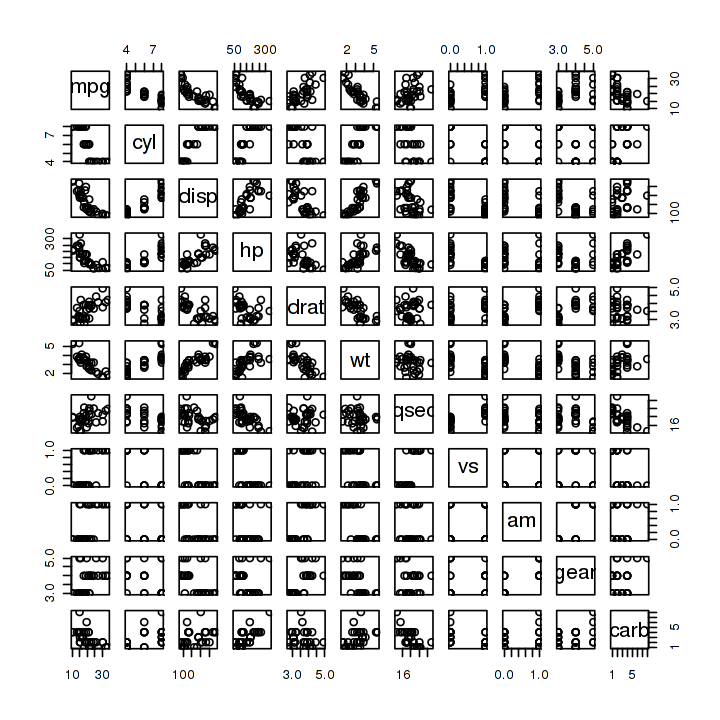

In [23]:
options(repr.plot.width = 6, repr.plot.height = 6)
pairs(mtcars)

In [25]:
options(repr.plot.width = 3, repr.plot.height = 3)
library("Hmisc")
res2 <- rcorr(as.matrix(mtcars))
res2


       mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
mpg   1.00 -0.85 -0.85 -0.78  0.68 -0.87  0.42  0.66  0.60  0.48 -0.55
cyl  -0.85  1.00  0.90  0.83 -0.70  0.78 -0.59 -0.81 -0.52 -0.49  0.53
disp -0.85  0.90  1.00  0.79 -0.71  0.89 -0.43 -0.71 -0.59 -0.56  0.39
hp   -0.78  0.83  0.79  1.00 -0.45  0.66 -0.71 -0.72 -0.24 -0.13  0.75
drat  0.68 -0.70 -0.71 -0.45  1.00 -0.71  0.09  0.44  0.71  0.70 -0.09
wt   -0.87  0.78  0.89  0.66 -0.71  1.00 -0.17 -0.55 -0.69 -0.58  0.43
qsec  0.42 -0.59 -0.43 -0.71  0.09 -0.17  1.00  0.74 -0.23 -0.21 -0.66
vs    0.66 -0.81 -0.71 -0.72  0.44 -0.55  0.74  1.00  0.17  0.21 -0.57
am    0.60 -0.52 -0.59 -0.24  0.71 -0.69 -0.23  0.17  1.00  0.79  0.06
gear  0.48 -0.49 -0.56 -0.13  0.70 -0.58 -0.21  0.21  0.79  1.00  0.27
carb -0.55  0.53  0.39  0.75 -0.09  0.43 -0.66 -0.57  0.06  0.27  1.00

n= 32 


P
     mpg    cyl    disp   hp     drat   wt     qsec   vs     am     gear  
mpg         0.0000 0.0000 0.0000 0.0000 0.0000 0.0171 0.0000 

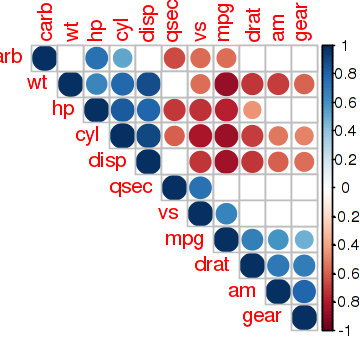

In [28]:
library(corrplot)
# Insignificant correlation are crossed
corrplot(res2$r, type="upper", order="hclust", 
         p.mat = res2$P, sig.level = 0.01, insig = "blank")


# Comparison Measures

In [85]:
### create a function that calculates the Chi-Square statistic between two vectors

CHISQR <- function(obs,exp, alpha=0.05) {
  x2 <- sum((obs-exp)^2/exp)
  df <- length(obs)-1
  cv <- pchisq(1 - (alpha/2),df=df)
  ## results
  txt <- paste("Chi-square.test = ",round(x2,4)," - df = ", df," - Critical value = ",round(cv,4),". The difference is ",sep="")
  ## If the t-value is grater than the critical value we reject the null hypothesis = significant difference
  res <- ifelse(x2 > cv,paste(txt,"significant"),paste(txt,"non-significant"))
  return(res)
}

In [86]:
df <- data.frame(color=c("Blue","Brown","Green","Orange","Red","Yellow"),
                 dist=c(0.24,0.13,0.16,0.20,0.13,0.14),
                 observed=c(481,371,483,544,372,369))

df$expected <- sum(df$observed) * df$dist


In [87]:
print(CHISQR(df$observed,df$expected))
print(chisq.test(x=df$observed,p=df$dist))


[1] "Chi-square.test = 50.8352 - df = 5 - Critical value = 0.0354. The difference is  significant"

	Chi-squared test for given probabilities

data:  df$observed
X-squared = 50.835, df = 5, p-value = 9.348e-10



# Difference Measures

In [88]:
### create a function that calculates the t-test statistic between two vectors
TTEST <- function(x,y,alpha=0.05) {
  ## calculate the t-value
  tt <- (mean(x)-mean(y))/sqrt(((VAR(x)/length(x)))+(VAR(y)/length(y)))
  ## calculate the degrees of freedom
  df <- length(x)+length(y)-2
  ## calculate the critical value for the selected alpha and degrees of freedom
  tdist <- qt(1 - (alpha/2),df=df)
  ## results
  txt <- paste("t.test = ",round(tt,4)," - df = ", df," - Critical value = ",round(tdist,4),". The difference is ",sep="")
  ## If the t-value is grater than the critical value we reject the null hypothesis = significant difference
  res <- ifelse(tt > tdist,paste(txt,"significant"),paste(txt,"non-significant"))
  return(res)
}


In [89]:
## data
age1 <- c(40,30,35,48,29,33,42,36,41,30)
age2 <- c(22,34,26,33,41,25,31,29,36,30)


In [90]:
print(TTEST(age1,age2))
print(t.test(age1,age2,var.equal=T))


[1] "t.test = 2.1467 - df = 18 - Critical value = 2.1009. The difference is  significant"

	Two Sample t-test

data:  age1 and age2
t = 2.1467, df = 18, p-value = 0.04569
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  0.1216662 11.2783338
sample estimates:
mean of x mean of y 
     36.4      30.7 

